<a href="https://colab.research.google.com/github/Wambua-F/Tracking_Migration/blob/main/Bird_Migration_with_latlong_cordinates_and_unique_tags.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import geopandas as gpd

from shapely.geometry import LineString



In [3]:
# Load the data and print the first 5 rows
birds_df = pd.read_csv("/content/drive/MyDrive/Bird Migration/purple_martin.csv", parse_dates=['timestamp'])
print("There are {} different birds in the dataset.".format(birds_df["tag-local-identifier"].nunique()))
birds_df.head()

There are 11 different birds in the dataset.


,timestamp,location-long,location-lat,tag-local-identifier
0,2014-08-15 05:56:00,-88.146014,17.513049,30448
1,2014-09-01 05:59:00,-85.243501,13.095782,30448
2,2014-10-30 23:58:00,-62.906089,-7.852436,30448
3,2014-11-15 04:59:00,-61.776826,-11.723898,30448
4,2014-11-30 09:59:00,-61.241538,-11.612237,30448


In [5]:
from shapely.geometry import Point

# Load the data
birds_df = pd.read_csv("/content/drive/MyDrive/Bird Migration/purple_martin.csv", parse_dates=['timestamp'])

# Print the number of unique birds
print("There are {} different birds in the dataset.".format(birds_df["tag-local-identifier"].nunique()))

# Print the first 5 rows
print(birds_df.head())

# Create the GeoDataFrame
geometry = [Point(xy) for xy in zip(birds_df["location-long"], birds_df["location-lat"])]
birds = gpd.GeoDataFrame(birds_df, geometry=geometry)

# Set the CRS to 'epsg:4326'
birds.crs = {'init': 'epsg:4326'}

# Print the first 5 rows of the GeoDataFrame
print(birds.head())


There are 11 different birds in the dataset.
            timestamp  location-long  location-lat  tag-local-identifier
0 2014-08-15 05:56:00     -88.146014     17.513049                 30448
1 2014-09-01 05:59:00     -85.243501     13.095782                 30448
2 2014-10-30 23:58:00     -62.906089     -7.852436                 30448
3 2014-11-15 04:59:00     -61.776826    -11.723898                 30448
4 2014-11-30 09:59:00     -61.241538    -11.612237                 30448
            timestamp  location-long  location-lat  tag-local-identifier  \
0 2014-08-15 05:56:00     -88.146014     17.513049                 30448   
1 2014-09-01 05:59:00     -85.243501     13.095782                 30448   
2 2014-10-30 23:58:00     -62.906089     -7.852436                 30448   
3 2014-11-15 04:59:00     -61.776826    -11.723898                 30448   
4 2014-11-30 09:59:00     -61.241538    -11.612237                 30448   

                      geometry  
0   POINT (-88.14601 17.513

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [6]:
# Load a GeoDataFrame with country boundaries in North/South America, print the first 5 rows
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
americas = world.loc[world['continent'].isin(['North America', 'South America'])]
americas.head()

<ipython-input-6-ec4d355ea9ed>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
9,44938712.0,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
10,18952038.0,South America,Chile,CHL,282318,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."
16,11263077.0,North America,Haiti,HTI,14332,"POLYGON ((-71.71236 19.71446, -71.62487 19.169..."


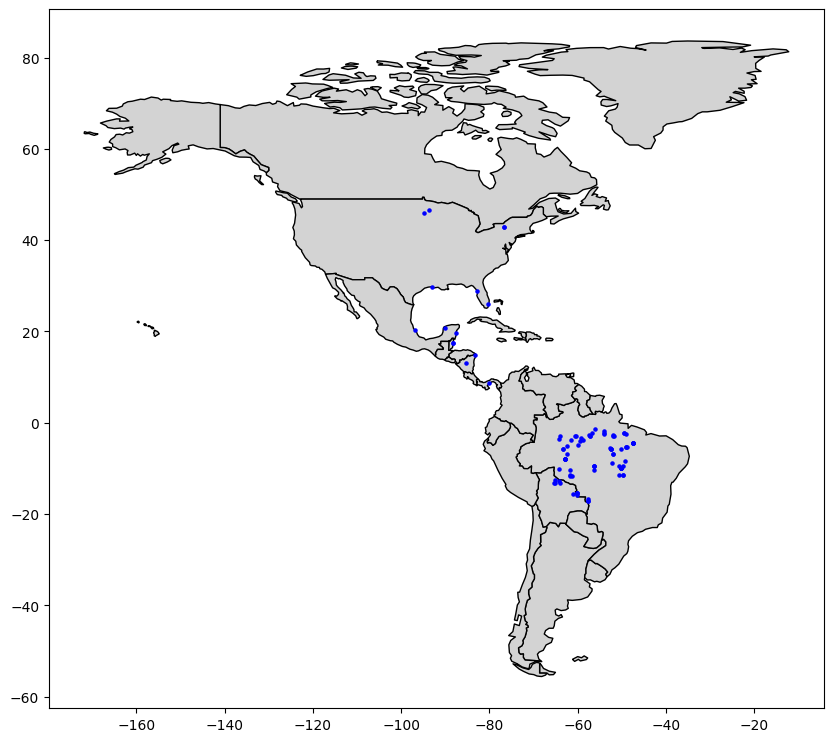

In [7]:
# Plot&create map
import matplotlib.pyplot as plt

# Assuming you have the americas GeoDataFrame loaded
# americas = gpd.read_file("path_to_americas_shapefile.shp")

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the country boundaries
americas.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot the bird points
birds.plot(ax=ax, color='blue', markersize=5)

# Show the plot
plt.show()


# Uncomment to see a hint
#q_2.hint()

In [8]:
# Where does each bird start and end its journey?
# GeoDataFrame showing path for each bird
path_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: LineString(x)).reset_index()
path_gdf = gpd.GeoDataFrame(path_df, geometry=path_df.geometry)
path_gdf.crs = {'init' :'epsg:4326'}

# GeoDataFrame showing starting point for each bird
start_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[0]).reset_index()
start_gdf = gpd.GeoDataFrame(start_df, geometry=start_df.geometry)
start_gdf.crs = {'init' :'epsg:4326'}

# Show first five rows of GeoDataFrame
start_gdf.head()

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,tag-local-identifier,geometry
0,30048,POINT (-90.12992 20.73242)
1,30054,POINT (-93.60861 46.50563)
2,30198,POINT (-80.31036 25.92545)
3,30263,POINT (-76.78146 42.99209)
4,30275,POINT (-76.78213 42.99207)


NameError: name 'end_gdf' is not defined

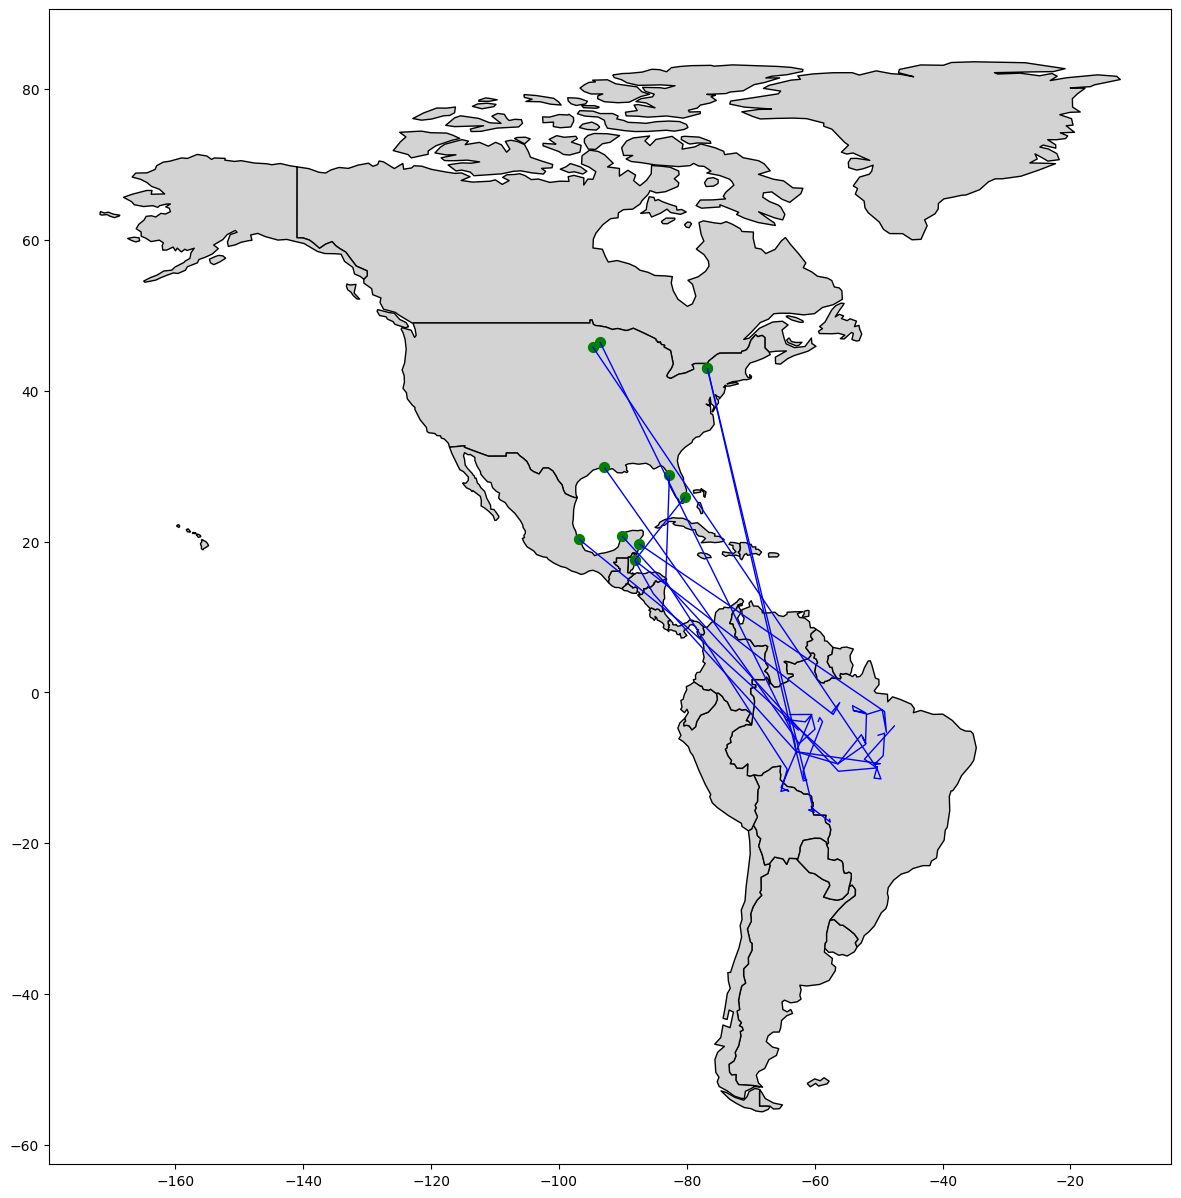

In [9]:
# starting and end points
import matplotlib.pyplot as plt

# Assuming you have the americas GeoDataFrame loaded
# americas = gpd.read_file("path_to_americas_shapefile.shp")

# Create the plot
fig, ax = plt.subplots(figsize=(15, 15))

# Plot the country boundaries
americas.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot the bird paths
path_gdf.plot(ax=ax, color='blue', linewidth=1, label='Bird Paths')

# Plot the starting points
start_gdf.plot(ax=ax, color='green', markersize=50, label='Starting Points', marker='o')

# Plot the ending points
end_gdf.plot(ax=ax, color='red', markersize=50, label='Ending Points', marker='x')

# Add a legend
plt.legend()

# Set plot title
plt.title('Paths of Birds with Starting and Ending Points')

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


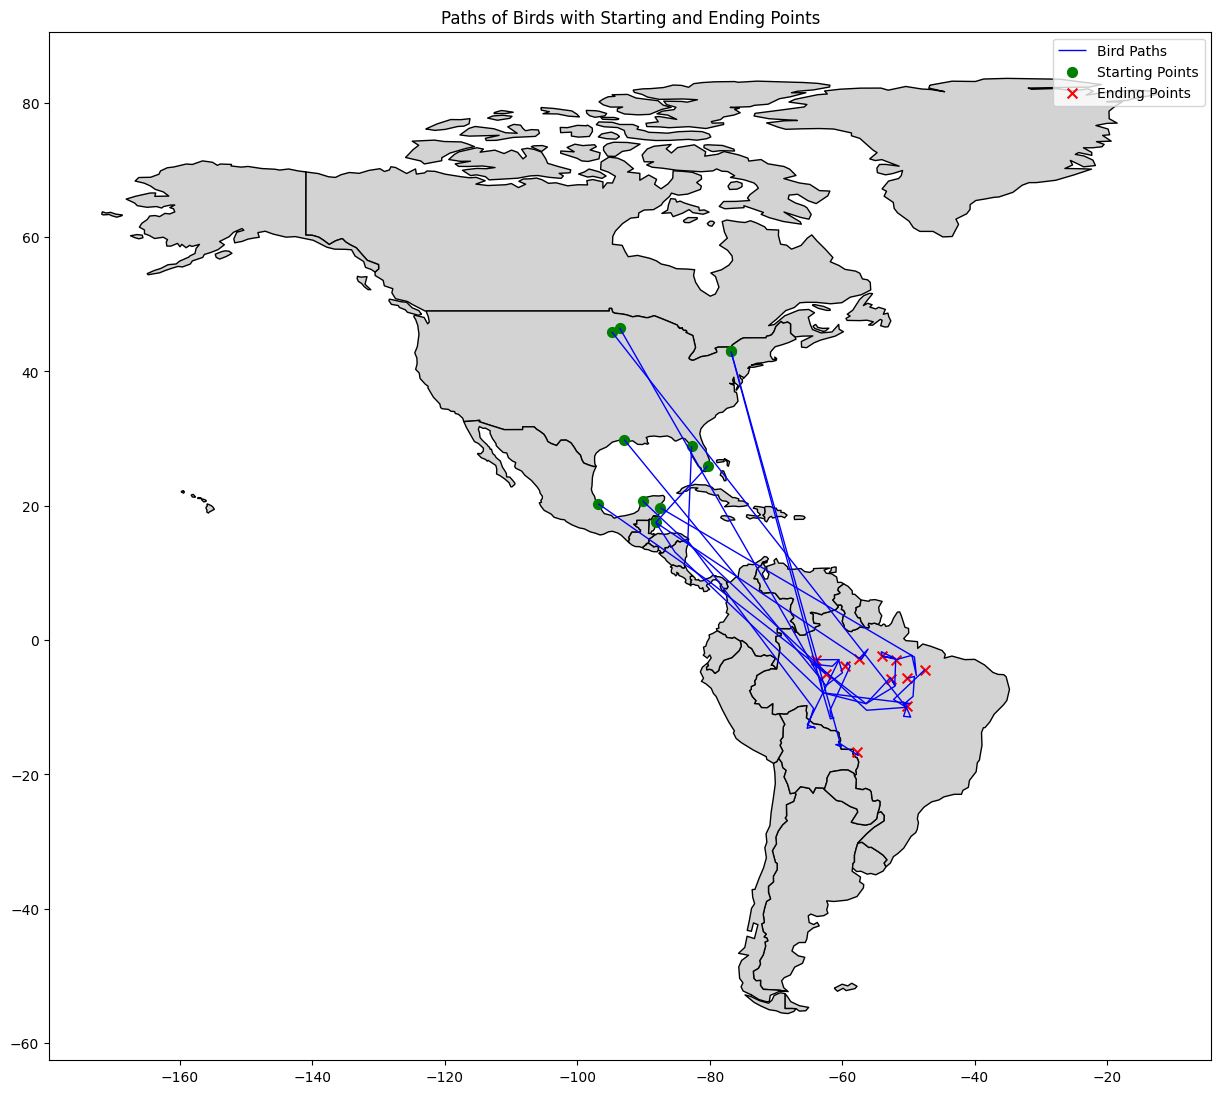

In [11]:
# starting and end points
import matplotlib.pyplot as plt

# Assuming you have the americas GeoDataFrame loaded
# americas = gpd.read_file("path_to_americas_shapefile.shp")

# Create the plot
fig, ax = plt.subplots(figsize=(15, 15))

# Plot the country boundaries
americas.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot the bird paths
path_gdf.plot(ax=ax, color='blue', linewidth=1, label='Bird Paths')

# Plot the starting points
start_gdf.plot(ax=ax, color='green', markersize=50, label='Starting Points', marker='o')

#Calculate end points
end_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[-1]).reset_index()
end_gdf = gpd.GeoDataFrame(end_df, geometry=end_df.geometry)
end_gdf.crs = {'init' :'epsg:4326'}

# Plot the ending points
end_gdf.plot(ax=ax, color='red', markersize=50, label='Ending Points', marker='x')

# Add a legend
plt.legend()

# Set plot title
plt.title('Paths of Birds with Starting and Ending Points')

# Show the plot
plt.show()

In [12]:
# Where are the protected areas in South America?

import geopandas as gpd
# Path of the shapefile to load
protected_filepath = "/content/drive/MyDrive/Bird Migration/SAPA_Aug2019-shapefile-polygons.shp"
# Load the shapefile into a GeoDataFrame
protected_areas = gpd.read_file(protected_filepath)
# Display the first 5 rows of the GeoDataFrame
print(protected_areas.head())


ERROR:fiona._env:Error in fread() reading object of size 63052136 at offset 135242252 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 45410332 at offset 198294388 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 15112 at offset 243704720 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 888 at offset 243719832 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 8632 at offset 243720720 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 36752 at offset 243729352 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 14088 at offset 243766104 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 536 at offset 243780192 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 136 at offset 243780728 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 344 at offset 243780864 from .shp file
ERROR:fiona._env:Error 

        WDPAID   WDPA_PID PA_DEF                        NAME  \
0      14067.0      14067      1           Het Spaans Lagoen   
1      14003.0      14003      1  Bubali Pond Bird Sanctuary   
2  555624439.0  555624439      1        Arikok National Park   
3     303894.0     303894      1                      Madidi   
4     303893.0     303893      1                  Apolobamba   

                    ORIG_NAME  \
0           Het Spaans Lagoen   
1  Bubali Pond Bird Sanctuary   
2        Arikok National Park   
3                      Madidi   
4                  Apolobamba   

                                              DESIG  \
0  Ramsar Site, Wetland of International Importance   
1                                    Bird Sanctuary   
2                                     National Park   
3                  Area Natural de Manejo Integrado   
4          Area Natural de Manejo Integado Nacional   

                                          DESIG_ENG     DESIG_TYPE  \
0  Ramsar Site,

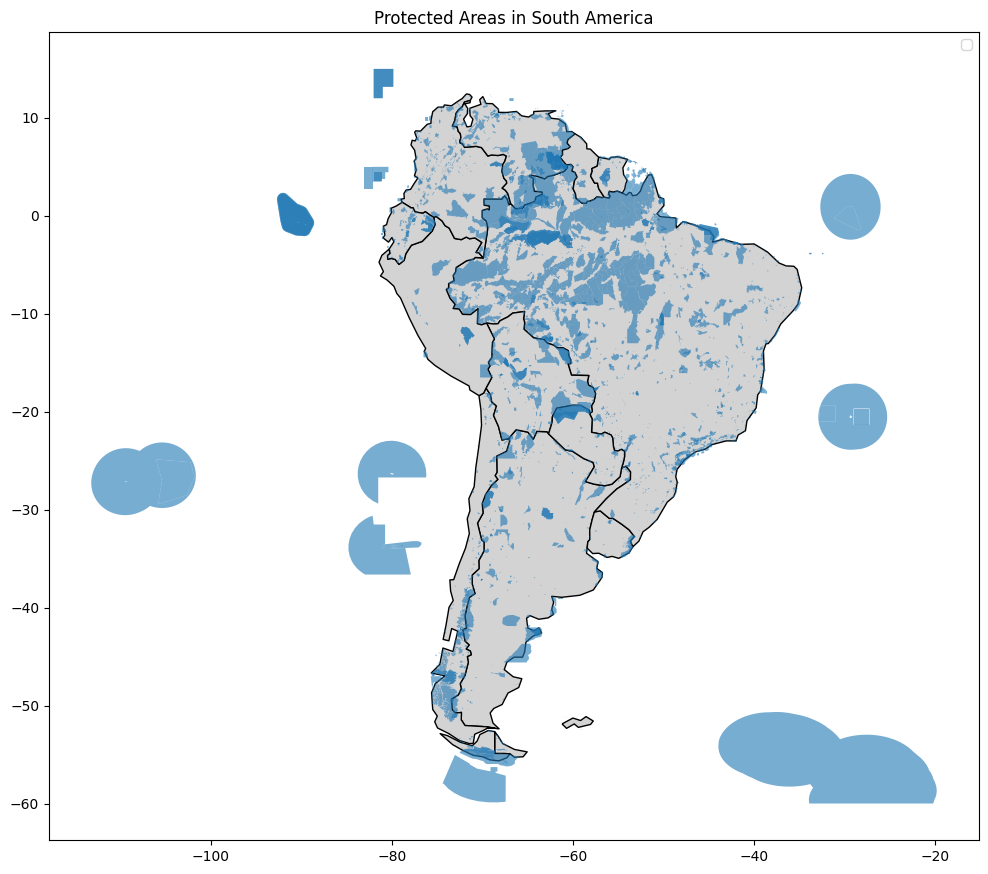

In [13]:
# plot that uses the protected_areas GeoDataFrame to show the locations of the protected areas in South America.
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming you have already loaded the americas and protected_areas GeoDataFrames

# Filter country boundaries for South America
south_america = americas.loc[americas['continent'] == 'South America']

# Create the plot
fig, ax = plt.subplots(figsize=(12, 12))

# Plot country boundaries
south_america.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot protected areas
protected_areas.plot(ax=ax, alpha=0.6)

# Add title and legend
plt.title('Protected Areas in South America')
plt.legend(['Country Boundaries', 'Protected Areas'])

# Show plot
plt.show()


In [14]:
#What percentage of South America is protected?
P_Area = sum(protected_areas['REP_AREA']-protected_areas['REP_M_AREA'])
print("South America has {} square kilometers of protected areas.".format(P_Area))

South America has 5396761.9116883585 square kilometers of protected areas.


In [15]:

# Calculate the total area of South America in square kilometers
totalArea = south_america.to_crs(epsg=3035).geometry.area.sum() / 1e6  # Convert to square kilometers

print("Total area of South America: {:.2f} square kilometers".format(totalArea))

Total area of South America: 17759005.82 square kilometers


In [16]:
# What percentage of South America is protected?
percentage_protected = P_Area/totalArea
print('Approximately {}% of South America is protected.'.format(round(percentage_protected*100, 2)))

Approximately 30.39% of South America is protected.


<ipython-input-18-dcddd89a7b94>:18: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


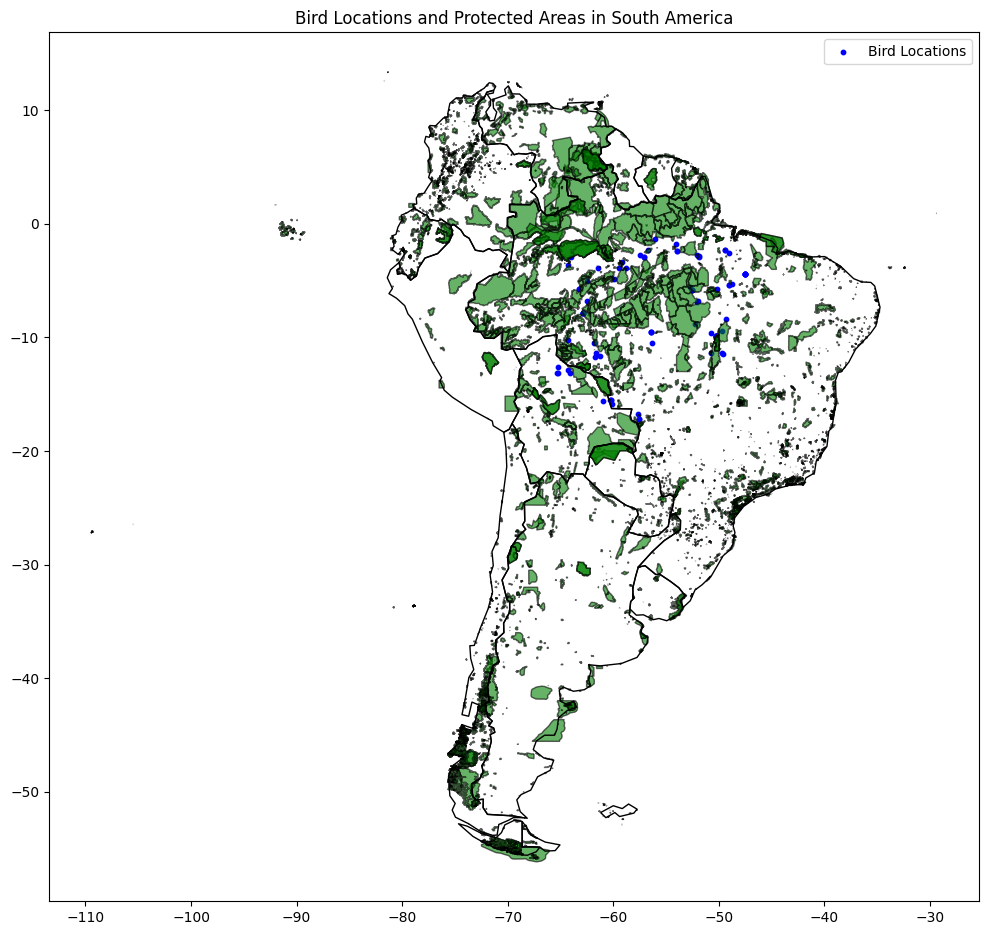

In [18]:
## Filter protected areas to exclude purely marine areas
protected_areas_land = protected_areas[protected_areas['MARINE'] != '2']

# Create the plot
fig, ax = plt.subplots(figsize=(12, 12))

# Plot locations where birds were discovered in South America
birds[birds.within(south_america.unary_union)].plot(ax=ax, color='blue', markersize=10, label='Bird Locations')

# Plot locations of protected areas in South America
protected_areas_land.plot(ax=ax, color='green', alpha=0.6, edgecolor='black', label='Protected Areas')

# Plot country boundaries for South America
south_america.plot(ax=ax, color='none', edgecolor='black')

# Add title and legend
plt.title('Bird Locations and Protected Areas in South America')
plt.legend()

# Show plot
plt.show()
